# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [33]:
# Import your libraries
import pandas as pd
import numpy as np

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [34]:
# Your code here
from scipy import stats

mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

# null hypothesis: x comes from a normal distribution
# no rejection of null hypothesis

/Users/admin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (0.8532991612485307, 0.6526922281624609)
1    (2.2626544807397564, 0.32260479804004344)
2    (0.48556610158262237, 0.7844416793138388)
3      (2.96718166823152, 0.22682174504166322)
4     (1.0698497738466526, 0.5857132832192969)
dtype: object

#### Interpret the normaltest results and make your observations.

In [35]:
# Explain the test results here
tests

# null hypothesis: x comes from a normal distribution
# no rejection of null hypothesis

0     (0.8532991612485307, 0.6526922281624609)
1    (2.2626544807397564, 0.32260479804004344)
2    (0.48556610158262237, 0.7844416793138388)
3      (2.96718166823152, 0.22682174504166322)
4     (1.0698497738466526, 0.5857132832192969)
dtype: object

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

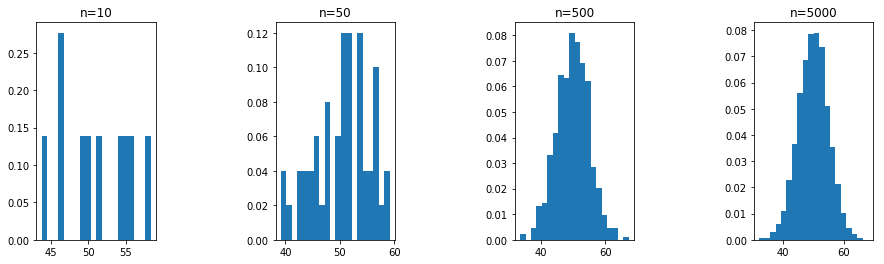

In [36]:
# Your code here
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [37]:
# Your comment and explanation here

# when independent random variables are added, their properly normalized sum tends toward a normal distribution (bell curve) 
# even if the original variables themselves are not normally distributed. 


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

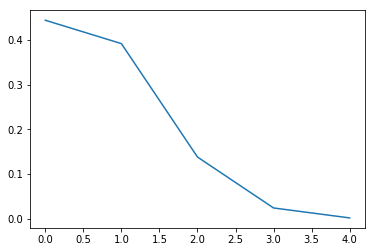

In [38]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [39]:
# Your comment here

# higher probability of having 0 person clicking on Ad. probability gets lower when cumulating 1, 2, 3, 4 people clicking on the Ad.

#### Now plot PMP with 50, 500, and 5000 visitors.

0.15745276234255506
0.04990851539917234
0.015798666772438668


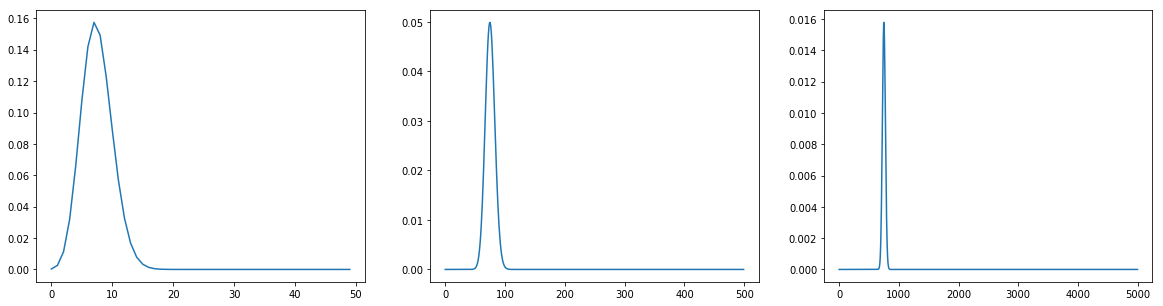

In [42]:
# Your code here


fig, ax = plt.subplots(1, 3,figsize=(20,5))

plt.subplot(1,3,1)
dist = binom(50, 0.15)
plt.plot(range(50), dist.pmf(range(50)))
print(max(dist.pmf(range(50))))


plt.subplot(1,3,2)
dist=binom(500, 0.15)
plt.plot(range(500), dist.pmf(range(500)))
print(max(dist.pmf(range(500))))


plt.subplot(1,3,3)
dist= binom(5000, 0.15)
plt.plot(range(5000), dist.pmf(range(5000)))
print(max(dist.pmf(range(5000))))

plt.show()

In [51]:
binom.pmf(750, 5000, 0.15)

0.015798666772438668

In [52]:
750/5000

0.15

#### What did you notice from the distribution plots? Comment your findings.

In [43]:
# Your comment here

# when n higher, probability of success is higher for a same number of visitors.
binom.pmf(5, 5, 0.15)

7.593750000000001e-05

In [44]:
binom.pmf(1, 5, 0.15)

0.3915046874999999

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
# used as a counting variable (count number of occurrences of an event within a time frame). 
#For this reason Poisson processes are also known as counting processes.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

0.023026546149191047
[283 304 310 293 283 311 327 291 325 297 316 346 292 295 304 316 286 336
 299 301 300 318 279 317 324 279 285 299 291 290 322 300 293 291 302 296
 326 323 297 300 293 290 273 272 292 291 338 279 298 293 301 293 299 291
 262 274 302 305 297 301 290 329 307 314 292 321 308 311 278 297 268 286
 305 301 337 310 332 311 310 300 305 310 337 283 272 309 311 293 313 277
 310 297 310 318 294 301 312 275 309 300 306 310 267 310 282 295 282 311
 306 318 310 292 287 294 289 285 297 273 312 313 340 320 289 316 313 283
 268 283 308 298 291 328 329 294 319 291 325 293 291 282 313 291 287 292
 284 281 275 311 326 313 288 296 308 303 269 285 308 270 303 300 339 276
 282 294 299 298 282 302 327 322 314 266 332 283 335 288 320 319 297 334
 332 317 294 309 280 309 299 282 292 303 315 296 285 301 282 300 306 299
 296 278 293 298 323 281 293 294 313 321 278 312 290 307 281 298 284 293
 271 322 281 343 314 332 289 305 258 313 314 312 293 267 293 284 319 266
 320 292 281 305 288 318 294 2

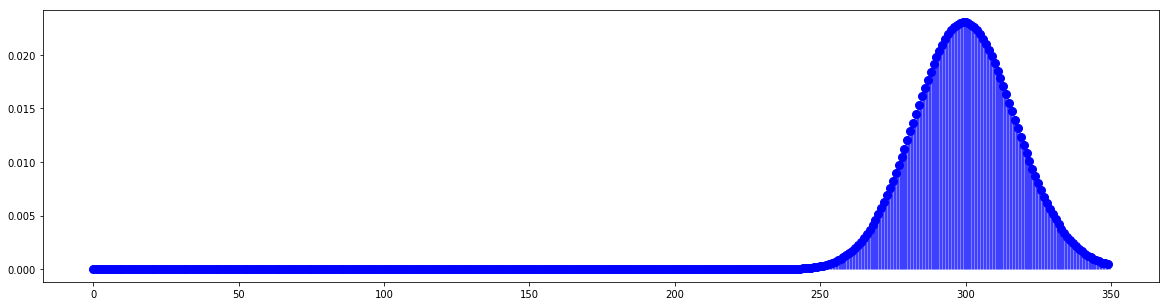

In [27]:
# Your code here

from scipy.stats import poisson
param = 300
po = stats.poisson(param)
print(po.pmf(param))     
print(po.rvs(350))
x = np.arange(0,350)
fig, ax = plt.subplots(1, 1, figsize = (20,5))
ax.plot(x, poisson.pmf(x, param), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, param), colors='b', lw=5, alpha=0.5)

# poisson.pmf(k, mu, loc) 

print(poisson.pmf(320, param))
# probability is 1.16%



#### What is the probability of getting 60 visits?

In [30]:
# Your code here
print(poisson.pmf(60, param))


2.622743762294515e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

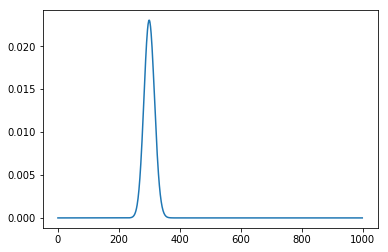

In [31]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)